# HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

The goal of this project is to predict the potentially fraudulent providers based on the claims filed by them. Along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. Further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.

For the purpose of this project, we are considering Inpatient claims, Outpatient claims and Beneficiary details of each provider. Lets s see their details :

A) Inpatient Data

This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.

B) Outpatient Data

This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

C) Beneficiary Details Data

This data contains beneficiary KYC details like health conditions,regioregion they belong to etc.

First we load all the data and take a look into the dataset. Clean each dataset and make the data ready for analysis and then merge them into a finalised dataset. For this we first change the labels of train_y data into 0 and 1, check for null values. Then likewise explore each dataset. Then merge inpatient and outpatient data, then merge the IP_OP dataset with the beneficiary data and finally merge IP_OP_Bene data with the train_y data to get a finalised dataset. Now we will train the final data with the models for prediction.

# Data wrangling and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Train and Test Data:

In [2]:
train_y = pd.read_csv(r"/Users/shabnanasser/workplace/git/Capstone_Two/Train-1542865627584.csv")
train_beneficiary = pd.read_csv(r"/Users/shabnanasser/workplace/git/Capstone_Two/Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv(r"/Users/shabnanasser/workplace/git/Capstone_Two/Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv(r"/Users/shabnanasser/workplace/git/Capstone_Two/Train_Outpatientdata-1542865627584.csv")

In [3]:
test_y = pd.read_csv(r"/Users/shabnanasser/workplace/git/Capstone_Two/Test-1542969243754.csv")
test_beneficiary = pd.read_csv(r"/Users/shabnanasser/workplace/git/Capstone_Two/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv(r"/Users/shabnanasser/workplace/git/Capstone_Two/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv(r"/Users/shabnanasser/workplace/git/Capstone_Two/Test_Outpatientdata-1542969243754.csv")

### Shape of data:

In [4]:
print('Shape of train_y data :',train_y.shape)
print('Shape of train_beneficiary data :',train_beneficiary.shape)
print('Shape of train_inpatient data :',train_inpatient.shape)
print('Shape of train_outpatient data :',train_outpatient.shape)

print('Shape of test_y data :',test_y.shape)
print('Shape of test_beneficiary data :',test_beneficiary.shape)
print('Shape of test_inpatient data :',test_inpatient.shape)
print('Shape of test_outpatient data :',test_outpatient.shape)

Shape of train_y data : (5410, 2)
Shape of train_beneficiary data : (138556, 25)
Shape of train_inpatient data : (40474, 30)
Shape of train_outpatient data : (517737, 27)
Shape of test_y data : (1353, 1)
Shape of test_beneficiary data : (63968, 25)
Shape of test_inpatient data : (9551, 30)
Shape of test_outpatient data : (125841, 27)


## train data

In [5]:
train_y.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [6]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [7]:
## Lets check whether  providers details are unique or not in train data

print(train_y.Provider.value_counts(sort=True,ascending=False).head(2))  # number of unique providers in train data.Check for duplicates

print('\n Total missing values in train_y :',train_y.isna().sum().sum())

print('\n Total missing values in test_y :',test_y.isna().sum().sum())

PRV51001    1
PRV55516    1
Name: Provider, dtype: int64

 Total missing values in train_y : 0

 Total missing values in test_y : 0


In [8]:
train_y['PotentialFraud'] = train_y['PotentialFraud'].replace("No", 0).replace("Yes", 1).astype(int)


In [9]:
train_y.head()

,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0


## train_beneficiary data

In [10]:
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [11]:
train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [12]:
train_beneficiary.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [13]:
#Looking for duplicates in train_beneficiary
train_beneficiary.duplicated().sum()

0

In [14]:
#How many unique beneficiaries we have in our dataset?
train_beneficiary['BeneID'].nunique()

138556

In [15]:
#convert DOB and DOD columns into correct date format

train_beneficiary['DOB'] = pd.to_datetime(train_beneficiary['DOB'], format="%Y-%m-%d")
train_beneficiary['DOD'] = pd.to_datetime(train_beneficiary['DOD'], format="%Y-%m-%d")


In [16]:
#calculate and add AGE column to beneficiary dataframe

train_beneficiary['AGE'] = np.round(((train_beneficiary['DOD'] - train_beneficiary['DOB']).dt.days)/365.0,1)

In [17]:
train_beneficiary.drop(labels=['DOD'],axis=1,inplace=True)

In [18]:
train_beneficiary.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,AGE
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,...,1,1,2,1,1,36000,3204,60,70,NaN
1,BENE11002,1936-09-01,2,1,0,39,280,12,12,2,...,2,2,2,2,2,0,0,30,50,NaN
2,BENE11003,1936-08-01,1,1,0,52,590,12,12,1,...,2,1,2,2,2,0,0,90,40,NaN
3,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,...,1,1,1,1,2,0,0,1810,760,NaN
4,BENE11005,1935-09-01,1,1,0,24,680,12,12,2,...,1,2,2,2,2,0,0,1790,1200,NaN


In [19]:
train_beneficiary['AGE'].describe()

count    1421.000000
mean       74.655735
std        10.669068
min        36.100000
25%        68.300000
50%        75.100000
75%        82.100000
max       100.300000
Name: AGE, dtype: float64

In [20]:
train_beneficiary["AGE"].fillna(0, inplace=True)

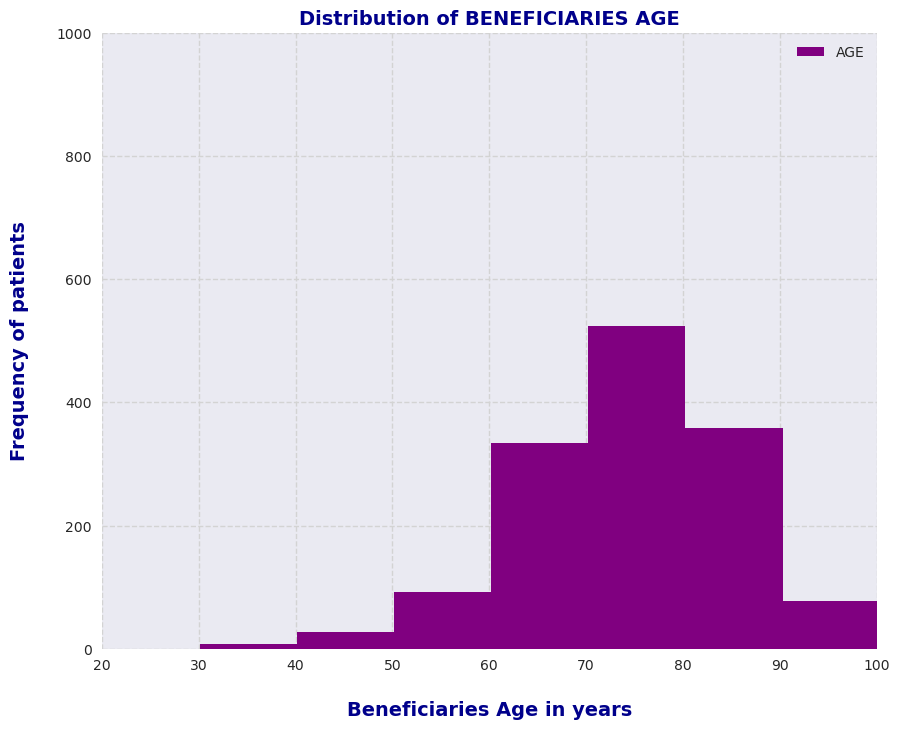

In [21]:
label_font_dict = {
    'fontsize': 14,
    'fontweight': 'bold',
    'color': 'darkblue',
}
title_font_dict = {
    'fontsize': 14,
    'fontweight': 'bold',
    'color': 'darkblue',
}

with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  train_beneficiary['AGE'].plot(kind='hist', color='purple')
  # Providing the labels and title to the graph
  plt.xlabel("\nBeneficiaries Age in years", fontdict=label_font_dict)
  plt.ylabel("Frequency of patients\n", fontdict=label_font_dict)
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES AGE", fontdict=title_font_dict)
  plt.xlim(20, 100)
  plt.ylim(0, 1000)
  plt.legend();


 The above graph tells us that the majority of the beneficiaries are between 65 to 85 years.

In [22]:
#beneficiaries on the basis of 'ChronicCond_Alzheimer'

# 1 means +ve with Chronic ALZH Disease
# 2 means -ve with Chronic ALZH Disease

train_beneficiary.groupby(['ChronicCond_Alzheimer'])['BeneID'].count()

ChronicCond_Alzheimer
1    46026
2    92530
Name: BeneID, dtype: int64

In [23]:
#Total Annual Sum of Max IP Reimbursement for 'ChronicCond_Alzheimer'

train_beneficiary.groupby(['ChronicCond_Alzheimer'])['IPAnnualReimbursementAmt'].sum()

ChronicCond_Alzheimer
1    247213280
2    259949690
Name: IPAnnualReimbursementAmt, dtype: int64

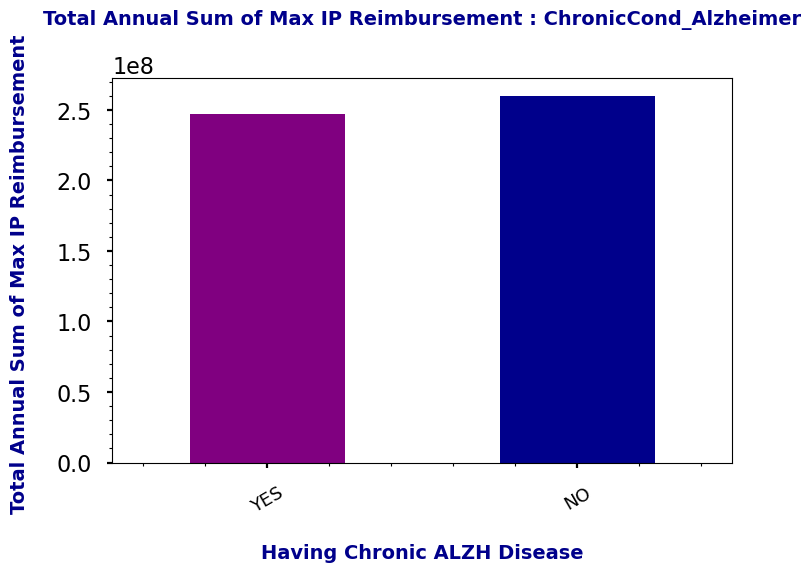

In [24]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(8,5))
  fig = train_beneficiary.groupby(['ChronicCond_Alzheimer'])['IPAnnualReimbursementAmt'].sum().plot(kind='bar', color=['purple','darkblue'])
# Providing the labels and title to the graph
  #plt.grid(which='major', linestyle="--", color='grey')
  plt.xlabel("\nHaving Chronic ALZH Disease", fontdict=label_font_dict)
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum of Max IP Reimbursement \n", fontdict=label_font_dict)
  plt.minorticks_on()
  plt.title("Total Annual Sum of Max IP Reimbursement : ChronicCond_Alzheimer\n", fontdict=title_font_dict)

This means if a beneficiary with or without chronic ALZH Disease get admitted then the annual reimbursement paid is approx same.

In [25]:
#Total Annual Sum of Max OP Reimbursement for 'ChronicCond_Alzheimer'

train_beneficiary.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum()

ChronicCond_Alzheimer
1     74721530
2    105154550
Name: OPAnnualReimbursementAmt, dtype: int64

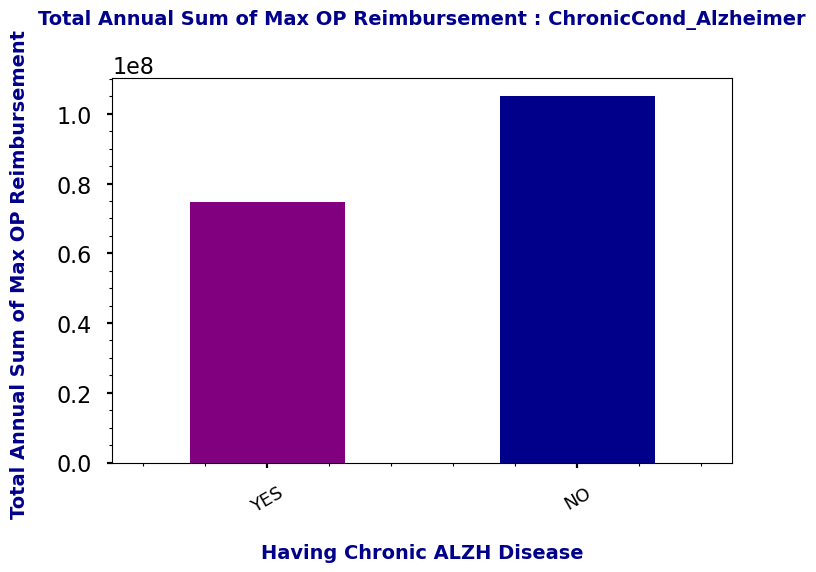

In [26]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(8,5))
  fig = train_beneficiary.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum().plot(kind='bar', color=['purple','darkblue'])
  plt.xlabel("\nHaving Chronic ALZH Disease", fontdict=label_font_dict)
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum of Max OP Reimbursement \n", fontdict=label_font_dict)
  plt.minorticks_on()
  plt.title("Total Annual Sum of Max OP Reimbursement : ChronicCond_Alzheimer\n", fontdict=title_font_dict)
    

Annual Sum of OP Reimbursement for non-chronic ALZH Disease beneficiaries is a lot more than others.

In [27]:
#Total Annual Sum of IP deductible amount (amount to pay their own) for 'ChronicCond_Alzheimer'

train_beneficiary.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum()

ChronicCond_Alzheimer
1    28200854
2    27200388
Name: IPAnnualDeductibleAmt, dtype: int64

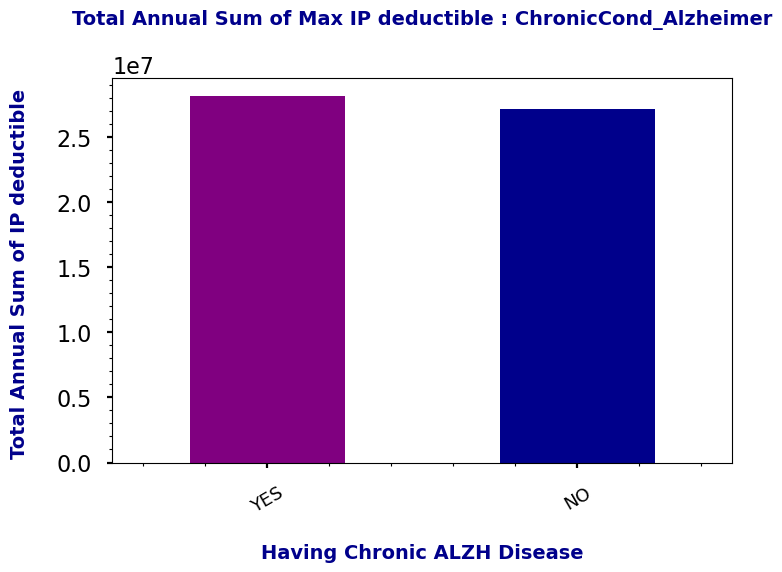

In [28]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(8,5))
  fig = train_beneficiary.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum().plot(kind='bar', color=['purple','darkblue'])
  plt.xlabel("\nHaving Chronic ALZH Disease", fontdict=label_font_dict)
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum of IP deductible \n", fontdict=label_font_dict)
  plt.minorticks_on()
  plt.title("Total Annual Sum of Max IP deductible : ChronicCond_Alzheimer\n", fontdict=title_font_dict)
    

Annual Sum of IP deductible amount paid by the patient of non-chronic & chronic ALZH Disease is almost same.

In [29]:
#Total Annual Sum of OP deductible amount for 'ChronicCond_Alzheimer'

train_beneficiary.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum()

ChronicCond_Alzheimer
1    21502981
2    30832150
Name: OPAnnualDeductibleAmt, dtype: int64

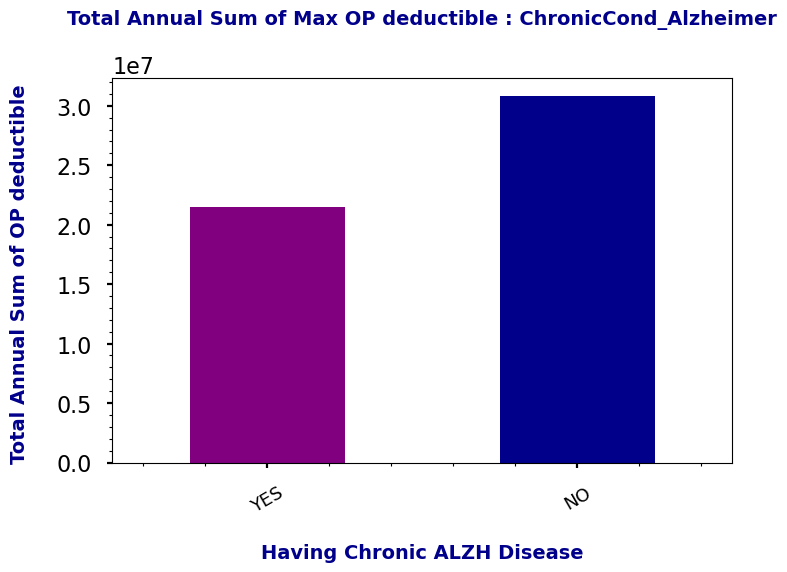

In [30]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(8,5))
  fig = train_beneficiary.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum().plot(kind='bar', color=['purple','darkblue'])
  plt.xlabel("\nHaving Chronic ALZH Disease", fontdict=label_font_dict)
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum of OP deductible \n", fontdict=label_font_dict)
  plt.minorticks_on()
  plt.title("Total Annual Sum of Max OP deductible : ChronicCond_Alzheimer\n", fontdict=title_font_dict)
    

Annual Sum of OP deductible amount paid by the patient of non-chronic is more as compared to chronic ALZH Disease.

In [31]:
#AVG IP Reimbursement Amt for chronic and non-chronic ALZH 

CC_ALZH_IP_R = pd.DataFrame(train_beneficiary.groupby(['ChronicCond_Alzheimer'])['IPAnnualReimbursementAmt'].sum() / train_beneficiary.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_ALZH_IP_R

,AVG IP Reimbursement Amt
ChronicCond_Alzheimer,
1,5371.165863
2,2809.355777


In [32]:
#AVG OP Reimbursement Amt

CC_ALZH_OP_R = pd.DataFrame(train_beneficiary.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum() / train_beneficiary.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_OP_R.columns= ['AVG OP Reimbursement Amt']
CC_ALZH_OP_R

,AVG OP Reimbursement Amt
ChronicCond_Alzheimer,
1,1623.463477
2,1136.437372


In [33]:
#AVG IP deductible Amt
CC_ALZH_IP_D= pd.DataFrame(train_beneficiary.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum() / train_beneficiary.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_IP_D.columns =  ['AVG IP Deductible Amt']
CC_ALZH_IP_D


,AVG IP Deductible Amt
ChronicCond_Alzheimer,
1,612.715726
2,293.962909


In [34]:
#AVG OP deductible Amt
CC_ALZH_OP_D= pd.DataFrame(train_beneficiary.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum() / train_beneficiary.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_OP_D.columns = ['AVG OP Deductible Amt']
CC_ALZH_OP_D


,AVG OP Deductible Amt
ChronicCond_Alzheimer,
1,467.192044
2,333.212472


In [35]:
CC_ALZH_all_amnts = pd.concat([CC_ALZH_IP_R, CC_ALZH_OP_R, CC_ALZH_IP_D, CC_ALZH_OP_D], axis = 1)
CC_ALZH_all_amnts

,AVG IP Reimbursement Amt,AVG OP Reimbursement Amt,AVG IP Deductible Amt,AVG OP Deductible Amt
ChronicCond_Alzheimer,,,,
1,5371.165863,1623.463477,612.715726,467.192044
2,2809.355777,1136.437372,293.962909,333.212472


<Figure size 800x500 with 0 Axes>

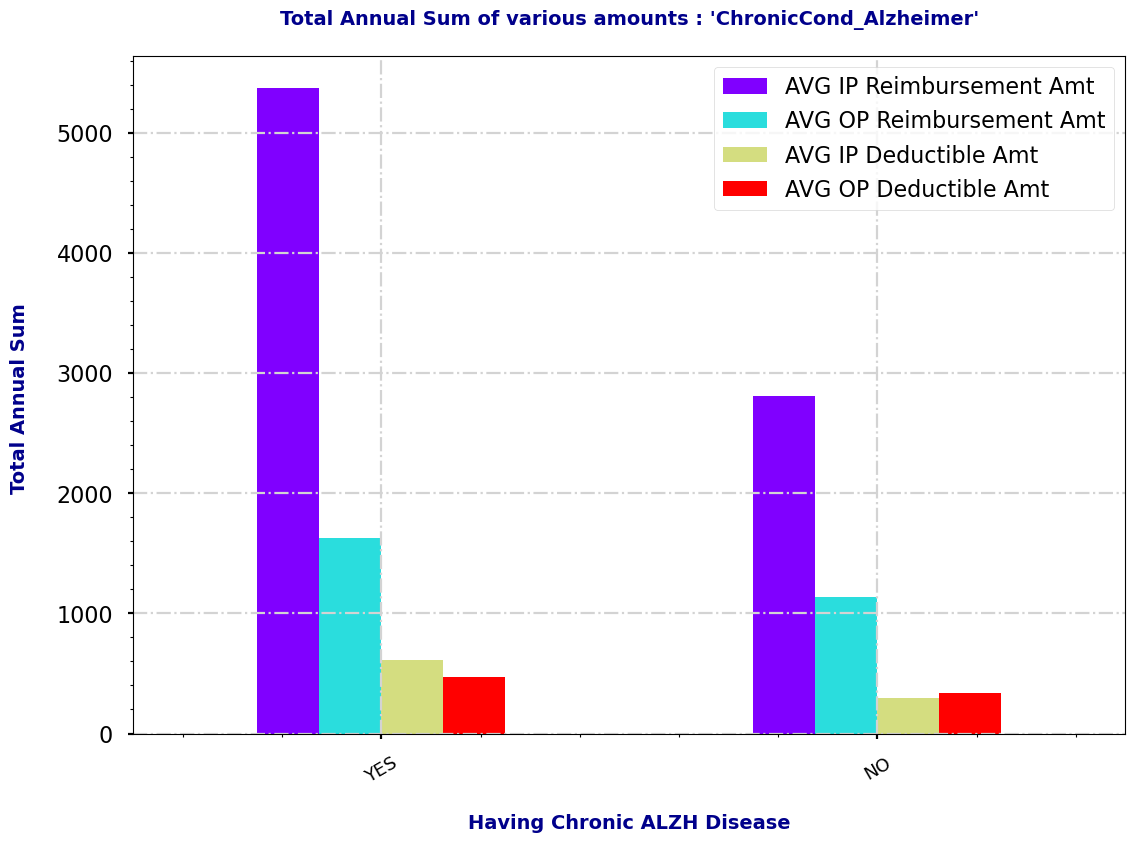

In [36]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(8,5))
  fig = CC_ALZH_all_amnts.plot(kind='bar', colormap='rainbow')
  # Providing the labels and title to the graph
  plt.xlabel("\nHaving Chronic ALZH Disease", fontdict=label_font_dict)
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n", fontdict=label_font_dict)
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_Alzheimer'\n", fontdict=title_font_dict)

Payer pays huge chunk of expenses specially when a beneficiary gets admitted with or without chronic ALZH disease. To be more precise, in case of +ve it is more than 50%.

In [37]:
#dropping columns NoOfMonths_PartACov and PartBCov, since it is no use

train_beneficiary.drop(["NoOfMonths_PartACov", "NoOfMonths_PartBCov"], axis=1, inplace=True)

In [38]:
train_beneficiary.shape

(138556, 23)

In [39]:
train_beneficiary.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,AGE
0,BENE11001,1943-01-01,1,1,0,39,230,1,2,1,...,1,1,2,1,1,36000,3204,60,70,0.0
1,BENE11002,1936-09-01,2,1,0,39,280,2,2,2,...,2,2,2,2,2,0,0,30,50,0.0
2,BENE11003,1936-08-01,1,1,0,52,590,1,2,2,...,2,1,2,2,2,0,0,90,40,0.0
3,BENE11004,1922-07-01,1,1,0,39,270,1,1,2,...,1,1,1,1,2,0,0,1810,760,0.0
4,BENE11005,1935-09-01,1,1,0,24,680,2,2,2,...,1,2,2,2,2,0,0,1790,1200,0.0


## train_inpatient data

In [40]:
train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [41]:
train_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [42]:
train_inpatient.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [43]:
train_inpatient['ClaimID'].nunique()

40474

### Adding Claim_Clearance_Days

In [44]:
train_inpatient['ClaimStartDt'] = pd.to_datetime(train_inpatient['ClaimStartDt'], format="%Y-%m-%d")
train_inpatient['ClaimEndDt'] = pd.to_datetime(train_inpatient['ClaimEndDt'], format="%Y-%m-%d")

In [45]:
train_inpatient['Claim_Duration'] = (train_inpatient['ClaimEndDt'] - train_inpatient['ClaimStartDt']).dt.days

In [46]:
train_inpatient['Claim_Duration'].describe()

count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: Claim_Duration, dtype: float64

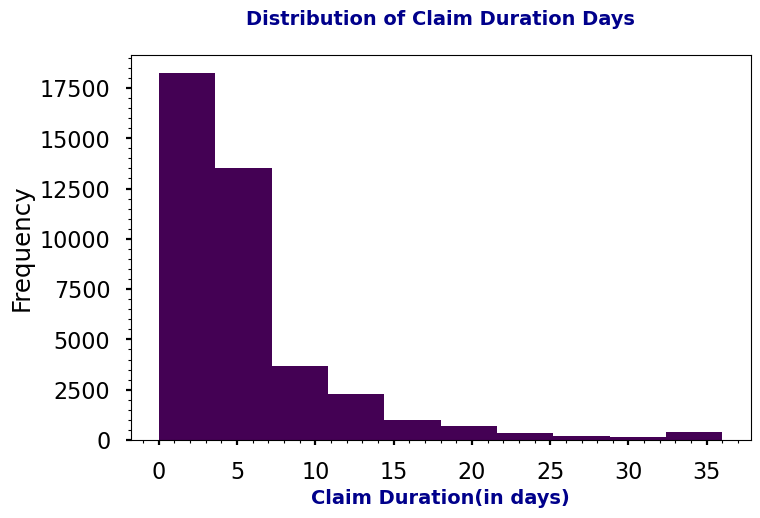

In [47]:
#displaying the number of only in-patients and out-patients
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(8,5))
    train_inpatient['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n", fontdict=title_font_dict)
    plt.plot();

### Checking the relationship between Amount of Insurance Claim Reimbursed v/s Claim Clearance Days

In [48]:
unq_claim_duration_days = train_inpatient['Claim_Duration'].unique()
unq_claim_duration_days

array([ 6,  2,  3,  8, 17,  5,  4,  7,  1, 11, 35,  9, 15, 12, 24, 23, 14,
        0, 10, 13, 18, 19, 28, 16, 21, 26, 22, 32, 27, 20, 31, 25, 34, 30,
       29, 33, 36])

In [49]:
#for each unique claim duration, how many claims were filed for that specific duration
tot_claims_filed_for_specific_days = pd.DataFrame(train_inpatient.groupby(['Claim_Duration'])['BeneID'].count())
tot_claims_filed_for_specific_days

,BeneID
Claim_Duration,
0,605
1,4599
2,6119
3,6899
4,4993
5,3579
6,2714
7,2210
8,1612


In [50]:
tot_insc_amount_for_claim_durations = pd.DataFrame(train_inpatient.groupby(['Claim_Duration'])['InscClaimAmtReimbursed'].sum())
tot_insc_amount_for_claim_durations

,InscClaimAmtReimbursed
Claim_Duration,
0,3925000
1,33356000
2,43987610
3,56477460
4,43932690
5,33962440
6,29057610
7,25537200
8,20637600


In [51]:
claim_clearance_amts = pd.merge(left=tot_claims_filed_for_specific_days, right=tot_insc_amount_for_claim_durations,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days.index,
                                right_on=tot_insc_amount_for_claim_durations.index)
claim_clearance_amts

,key_0,BeneID,InscClaimAmtReimbursed
0,0,605,3925000
1,1,4599,33356000
2,2,6119,43987610
3,3,6899,56477460
4,4,4993,43932690
5,5,3579,33962440
6,6,2714,29057610
7,7,2210,25537200
8,8,1612,20637600
9,9,1154,15083360


In [52]:
claim_clearance_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_clearance_amts.head()

,Claim_durations_in_days,Total_claims,All_Claims_Total_Amount
0,0,605,3925000
1,1,4599,33356000
2,2,6119,43987610
3,3,6899,56477460
4,4,4993,43932690


In [53]:
claim_clearance_amts['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts['All_Claims_Total_Amount']/claim_clearance_amts['Total_claims'],2)

In [54]:
claim_clearance_amts.head()

,Claim_durations_in_days,Total_claims,All_Claims_Total_Amount,Avg_Claim_Insc_Amount
0,0,605,3925000,6487.60
1,1,4599,33356000,7252.88
2,2,6119,43987610,7188.69
3,3,6899,56477460,8186.33
4,4,4993,43932690,8798.86


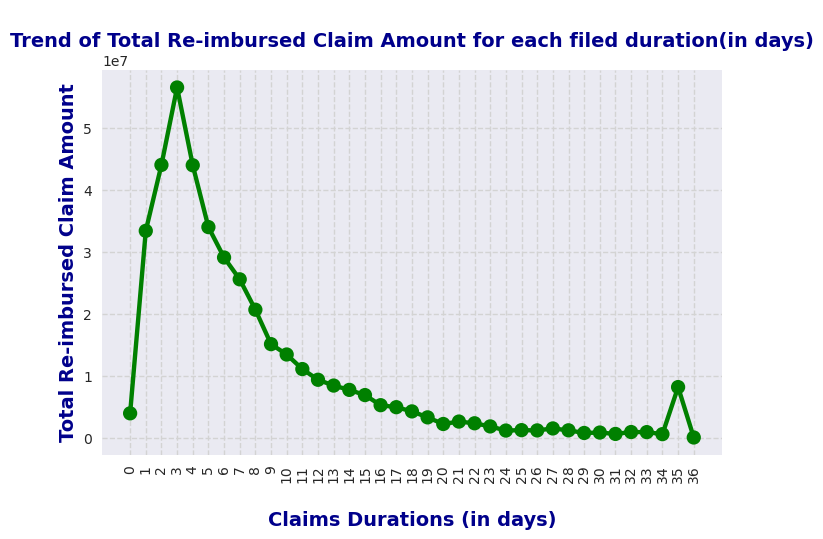

In [55]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,5))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='All_Claims_Total_Amount', color='green')
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations (in days)", fontdict= label_font_dict)
    plt.ylabel("Total Re-imbursed Claim Amount", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("\nTrend of Total Re-imbursed Claim Amount for each filed duration(in days)", fontdict=title_font_dict)
    plt.plot();

* The above graph tells us that the Total Re-imbursed Amount is the highest for 3 days claims

* Also, for claims with durations from 12 to 34 the total re-imbursed amount is very less, however, for 35 days duration we can witness a clear spike that can be a potential sign of fraudulent.

### Checking the relationship between Claimed and Admitted Durations with Re-imbursed Amount

In [56]:
train_inpatient['DischargeDt'] = pd.to_datetime(train_inpatient['DischargeDt'], format="%Y-%m-%d")
train_inpatient['AdmissionDt'] = pd.to_datetime(train_inpatient['AdmissionDt'], format="%Y-%m-%d")


In [57]:
train_inpatient['Admitted_Days'] = (train_inpatient['DischargeDt']-train_inpatient['AdmissionDt']).dt.days

In [58]:
claims_with_diff_admitted_and_claimed_dur = train_inpatient[(train_inpatient['Claim_Duration'] != train_inpatient['Admitted_Days'])]
claims_with_diff_admitted_and_claimed_dur

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_Duration,Admitted_Days
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,9,6
2163,BENE18587,CLM37486,2009-02-10,2009-02-11,PRV52020,3000,PHY359519,NaN,NaN,2009-02-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
3864,BENE24807,CLM82212,2008-12-31,2009-01-11,PRV54111,13000,PHY360669,PHY408812,NaN,2008-12-31,...,25000,NaN,5369.0,NaN,NaN,NaN,NaN,NaN,11,9
4422,BENE26849,CLM70032,2009-10-02,2009-10-07,PRV56647,12000,PHY332134,NaN,NaN,2009-09-29,...,42833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,8
5400,BENE30503,CLM67400,2009-09-12,2009-09-14,PRV54228,3000,PHY364179,NaN,NaN,2009-09-09,...,2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5
5647,BENE31388,CLM40738,2009-03-07,2009-03-08,PRV51490,16000,PHY325912,PHY325912,NaN,2009-03-02,...,73017,40390,8411.0,NaN,NaN,NaN,NaN,NaN,1,6
5869,BENE32209,CLM58624,2009-07-10,2009-07-17,PRV51249,6000,PHY326642,PHY383790,PHY372651,2009-07-06,...,NaN,NaN,9921.0,NaN,NaN,NaN,NaN,NaN,7,11
7752,BENE39346,CLM82211,2009-02-18,2009-02-26,PRV54065,19000,PHY337531,PHY341176,NaN,2009-02-18,...,4439,27801,3712.0,NaN,NaN,NaN,NaN,NaN,8,5
7828,BENE39685,CLM47198,2009-04-20,2009-04-22,PRV53705,600,PHY416391,PHY356670,NaN,2009-04-16,...,2724,NaN,9390.0,NaN,NaN,NaN,NaN,NaN,2,6
7869,BENE39802,CLM73187,2009-11-01,2009-11-05,PRV52100,3000,PHY366670,PHY348391,NaN,2009-10-24,...,40390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12


In [59]:
claims_with_diff_admitted_and_claimed_dur['InscClaimAmtReimbursed'].sum()

671400

In [60]:
#checking the rows with more claimed_duration than admitted_days 

claims_with_more_admitted_than_claimed_dur = train_inpatient[(train_inpatient['Claim_Duration'] > train_inpatient['Admitted_Days'])]
print(claims_with_more_admitted_than_claimed_dur.shape[0])


#checking the sum of insurance claim amt where claim duration greater than that of admitted days 

claims_with_diff_admitted_and_claimed_dur[claims_with_diff_admitted_and_claimed_dur['Claim_Duration']  > claims_with_diff_admitted_and_claimed_dur['Admitted_Days']]['InscClaimAmtReimbursed'].sum()


17


274000

In [61]:
#checking the rows with more admitted_days than claimed_duration 

claims_with_more_admitted_than_claimed_dur = train_inpatient[(train_inpatient['Claim_Duration'] < train_inpatient['Admitted_Days'])]
print(claims_with_more_admitted_than_claimed_dur.shape[0])


#checking the sum of insurance claim amt where admitted days  greater than that of Claim_Duration

claims_with_diff_admitted_and_claimed_dur[claims_with_diff_admitted_and_claimed_dur['Claim_Duration']  < claims_with_diff_admitted_and_claimed_dur['Admitted_Days']]['InscClaimAmtReimbursed'].sum()

32


397400

- The above tables tells us that there are 49 claims whose Claimed Duration and Admitted Duration are different. The total re-imbursed amount is around 0.67 Million. 
- 17 claims out of 49 have Claimed Duration greater than the Admitted Duration. And, for these 17 claims the total re-imbursed amount is around 0.27 Million.
- 32 claims out of 49 have Admitted Duration greater than the claimed Duration. And, for these 32 claims the total re-imbursed amount is around 0.39 Million.

### Checking the relationship between DeductibleAmtPaid and Re-imbursed Amount

In [62]:
#number of rows with deductible amt null means no deductibles paid

no_of_claim_with_no_copay = train_inpatient[train_inpatient['DeductibleAmtPaid'].isna()].shape[0]
no_of_claim_with_no_copay

899

In [63]:
#number of rows with deductible amt notnull means deductibles paid

no_of_claim_with_copay = train_inpatient[train_inpatient['DeductibleAmtPaid'].notna()].shape[0]
no_of_claim_with_copay

39575

In [64]:
#reimbursed amt for no co-pay

re_imbursed_amt_for_no_copay = train_inpatient[train_inpatient['DeductibleAmtPaid'].isna()]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_for_no_copay

10690000

In [65]:
#reimbursed amt with some deductibles

re_imbursed_amt_with_some_copay = train_inpatient[train_inpatient['DeductibleAmtPaid'].notna()]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_with_some_copay

397607020

In [66]:
tot_sum_of_claims_with_copay = re_imbursed_amt_with_some_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)
tot_sum_of_claims_with_no_copay = re_imbursed_amt_for_no_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)

In [67]:
tot_sum_of_claims_with_copay

0.9738180797890712

In [68]:
tot_sum_of_claims_with_no_copay

0.0261819202109288

The above finfings tells us that there are a 2% of total claims for which there is no co-payment.

And, for these 2% (or 899) of total claims the total re-imbursed amount is 10.6 Million that is 2.6% of the total re-imbursed amount.


In [69]:
train_inpatient['DeductibleAmtPaid'].fillna(value=0.0, inplace=True)

### Checking the relationship of Providers with Total number of claims filed & Re-imbursed Amount

In [70]:
# How many unique providers are there in the inpatient_data?
train_inpatient['Provider'].nunique()

2092

We have 2092 unique number of Providers in the in-patient dataset.

In [71]:
#count of claims filed for each unique provider

provider_tot_claims_filed = pd.DataFrame(train_inpatient.groupby(['Provider'])['ClaimID'].count())
provider_tot_claims_filed

,ClaimID
Provider,
PRV51001,5
PRV51003,62
PRV51007,3
PRV51008,2
PRV51011,1
...,...
PRV57719,4
PRV57728,1
PRV57729,11


In [72]:
#for each unique provider, calculating the total amount of money they have been reimbursed. (for all the claims they filed) 

provider_tot_reimbursed_amt = pd.DataFrame(train_inpatient.groupby(['Provider'])['InscClaimAmtReimbursed'].sum())
provider_tot_reimbursed_amt

,InscClaimAmtReimbursed
Provider,
PRV51001,97000
PRV51003,573000
PRV51007,19000
PRV51008,25000
PRV51011,5000
...,...
PRV57719,76000
PRV57728,6000
PRV57729,107000


In [73]:
# merging provider total claims filed with provider total reimbursed amt.

prv_tot_filed_claims_and_tot_reimb_amt = pd.merge(left=provider_tot_claims_filed, right=provider_tot_reimbursed_amt, how='inner',
                                                  left_on=provider_tot_claims_filed.index, right_on=provider_tot_reimbursed_amt.index)
prv_tot_filed_claims_and_tot_reimb_amt


,key_0,ClaimID,InscClaimAmtReimbursed
0,PRV51001,5,97000
1,PRV51003,62,573000
2,PRV51007,3,19000
3,PRV51008,2,25000
4,PRV51011,1,5000
...,...,...,...
2087,PRV57719,4,76000
2088,PRV57728,1,6000
2089,PRV57729,11,107000
2090,PRV57732,11,76000


In [74]:
#changing the column names of prv_tot_filed_claims_and_tot_reimb_amt

prv_tot_filed_claims_and_tot_reimb_amt.columns = ['ProviderID', 'Tot_Claims_Filed', 'Tot_Re_Imbursed_Amt']
prv_tot_filed_claims_and_tot_reimb_amt

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt
0,PRV51001,5,97000
1,PRV51003,62,573000
2,PRV51007,3,19000
3,PRV51008,2,25000
4,PRV51011,1,5000
...,...,...,...
2087,PRV57719,4,76000
2088,PRV57728,1,6000
2089,PRV57729,11,107000
2090,PRV57732,11,76000


In [75]:

prv_tot_filed_claims_and_tot_reimb_amt.reset_index(drop=True,inplace=True)

In [76]:
#adding a column for percentage of amt out of total reimbursed amt

prv_tot_filed_claims_and_tot_reimb_amt['Percentage_out_of_tot_reimb_amt'] = round((prv_tot_filed_claims_and_tot_reimb_amt['Tot_Re_Imbursed_Amt'] / 
                                                                                   train_inpatient['InscClaimAmtReimbursed'].sum()) * 100, 3)
prv_tot_filed_claims_and_tot_reimb_amt

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt
0,PRV51001,5,97000,0.024
1,PRV51003,62,573000,0.140
2,PRV51007,3,19000,0.005
3,PRV51008,2,25000,0.006
4,PRV51011,1,5000,0.001
...,...,...,...,...
2087,PRV57719,4,76000,0.019
2088,PRV57728,1,6000,0.001
2089,PRV57729,11,107000,0.026
2090,PRV57732,11,76000,0.019


In [77]:
#for each unique provider, the maximum amount of money they have been reimbursed for any single claim they filed.

provider_max_reimbursed_amt = pd.DataFrame(train_inpatient.groupby(['Provider'])['InscClaimAmtReimbursed'].max())
provider_max_reimbursed_amt

,InscClaimAmtReimbursed
Provider,
PRV51001,42000
PRV51003,57000
PRV51007,10000
PRV51008,21000
PRV51011,5000
...,...
PRV57719,57000
PRV57728,6000
PRV57729,24000


In [78]:
#renaming column names for provider_max_reimbursed_amt dataframe
provider_max_reimbursed_amt.rename(columns={"InscClaimAmtReimbursed": "Max_Re_Imbursed_Amt"}, inplace=True)
provider_max_reimbursed_amt

,Max_Re_Imbursed_Amt
Provider,
PRV51001,42000
PRV51003,57000
PRV51007,10000
PRV51008,21000
PRV51011,5000
...,...
PRV57719,57000
PRV57728,6000
PRV57729,24000


In [79]:
#merging prv_tot_filed_claims_and_tot_reimb_amt with provider_max_reimbursed_amt

prv_tot_filed_claims_tot_max_reimb_amt = pd.merge(left=prv_tot_filed_claims_and_tot_reimb_amt, 
                                                  right=provider_max_reimbursed_amt, how='inner',
                                                  left_on=prv_tot_filed_claims_and_tot_reimb_amt['ProviderID'], 
                                                  right_on=provider_max_reimbursed_amt.index)


In [80]:
#dropping index key_0 column
prv_tot_filed_claims_tot_max_reimb_amt.drop(['key_0'], axis=1, inplace=True)

In [81]:
#calculating difference between total and maximum reimbursed amt
prv_tot_filed_claims_tot_max_reimb_amt['Diff_in_Tot_and_Max'] = prv_tot_filed_claims_tot_max_reimb_amt['Tot_Re_Imbursed_Amt'] - \
prv_tot_filed_claims_tot_max_reimb_amt['Max_Re_Imbursed_Amt']

In [82]:
prv_tot_filed_claims_tot_max_reimb_amt.head()

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
0,PRV51001,5,97000,0.024,42000,55000
1,PRV51003,62,573000,0.140,57000,516000
2,PRV51007,3,19000,0.005,10000,9000
3,PRV51008,2,25000,0.006,21000,4000
4,PRV51011,1,5000,0.001,5000,0


In [83]:
prv_tot_filed_claims_tot_max_reimb_amt.sort_values(by=['Diff_in_Tot_and_Max','Max_Re_Imbursed_Amt','Percentage_out_of_tot_reimb_amt'],
                                                   axis=0, inplace=True)
                                            

In [84]:
prv_tot_filed_claims_tot_max_reimb_amt.head(60)

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
290,PRV51630,1,0,0.000,0,0
805,PRV53329,1,0,0.000,0,0
860,PRV53511,1,0,0.000,0,0
1342,PRV55184,1,0,0.000,0,0
1716,PRV56540,1,0,0.000,0,0
325,PRV51822,1,600,0.000,600,0
1583,PRV56038,1,1000,0.000,1000,0
280,PRV51618,1,2000,0.000,2000,0
905,PRV53764,1,2000,0.000,2000,0
1088,PRV54411,1,2000,0.000,2000,0


The above table showing us the Provider Ids who only filed 1 or 2 claims and got the entire amount re-imbursed.

## triain_out-patients data

In [85]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [86]:
train_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [87]:
train_outpatient.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [88]:
train_outpatient['ClaimID'].nunique()

517737

### Adding Claim_Clearance_Days

In [89]:
train_outpatient['ClaimStartDt'] = pd.to_datetime(train_outpatient['ClaimStartDt'], format="%Y-%m-%d")
train_outpatient['ClaimEndDt'] = pd.to_datetime(train_outpatient['ClaimEndDt'], format="%Y-%m-%d")

train_outpatient['Claim_Duration'] = (train_outpatient['ClaimEndDt'] - train_outpatient['ClaimStartDt']).dt.days



In [90]:
train_outpatient['Claim_Duration'].describe()

count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: Claim_Duration, dtype: float64

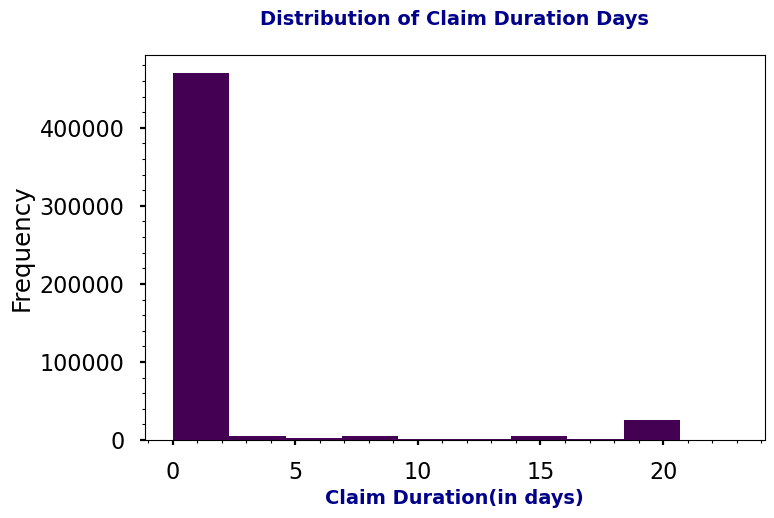

In [91]:
#displaying the number of only out-patients
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(8,5))
    train_outpatient['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n", fontdict=title_font_dict)
    plt.plot();


* From the above plot, we can decude that the majority of the claims filed for less than or equals to 2 days.

### What is the relationship b/w Claim Duration and Re-imbursed Amount?

/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/2426698043.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Claim_Duration", y="InscClaimAmtReimbursed", data=train_outpatient, palette="plasma")


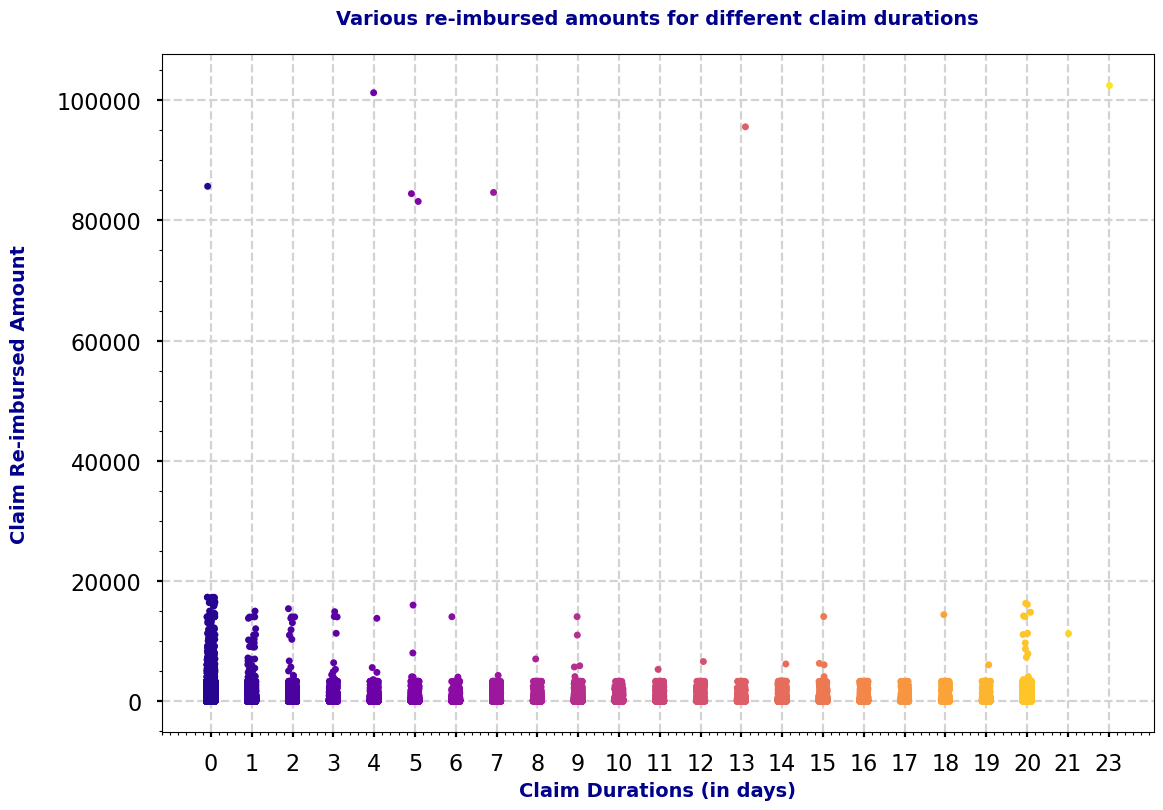

In [92]:
with plt.style.context("seaborn-poster"):
    sns.stripplot(x="Claim_Duration", y="InscClaimAmtReimbursed", data=train_outpatient, palette="plasma")
    # Providing the labels and title to the graph
    plt.xlabel("Claim Durations (in days)", fontdict=label_font_dict)
    plt.ylabel("Claim Re-imbursed Amount\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Various re-imbursed amounts for different claim durations\n", fontdict=title_font_dict)
    plt.plot();


* From this we can decude that the majority of the claims filed have re-imbursed amount less than 20,000 and very few have more than 1,00,000.

### What is the relationship b/w Claim Duration and Co-Payment?

/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/205166720.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Claim_Duration", y="DeductibleAmtPaid", data=train_outpatient, palette="plasma")


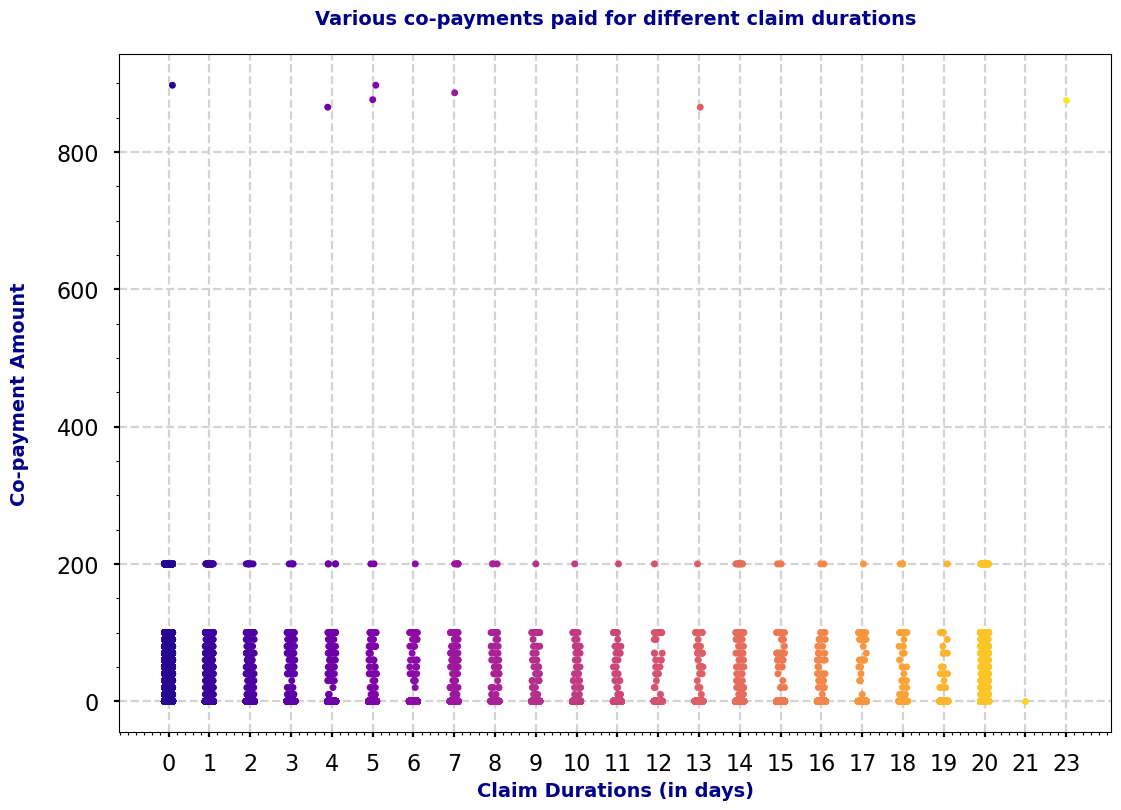

In [93]:
with plt.style.context("seaborn-poster"):
    sns.stripplot(x="Claim_Duration", y="DeductibleAmtPaid", data=train_outpatient, palette="plasma")
    # Providing the labels and title to the graph
    plt.xlabel("Claim Durations (in days)", fontdict=label_font_dict)
    plt.ylabel("Co-payment Amount\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Various co-payments paid for different claim durations\n", fontdict=title_font_dict)
    plt.plot();


* From the above plot, we can decude that the co-payment is similar across the various durations, most of them with 200, however, there are few co-payment which are very high or more than 800.

### Checking the relationship between Amount of Insurance Claim Reimbursed v/s Claim Clearance Days

In [94]:
unq_claim_duration_days = train_outpatient['Claim_Duration'].unique()
unq_claim_duration_days


array([ 0, 20, 12,  7, 14,  1, 15,  3,  6,  2, 13,  5,  9, 18, 10, 19, 16,
        4,  8, 17, 11, 23, 21])

In [95]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Claim_Duration'],
      dtype='object')

In [96]:
#for each unique claim duration, how many claims were filed for that specific duration
tot_claims_filed_for_specific_days = pd.DataFrame(train_outpatient.groupby(['Claim_Duration'])['ClaimID'].count())
tot_claims_filed_for_specific_days

,ClaimID
Claim_Duration,
0,453348
1,11960
2,4366
3,2597
4,2238
5,1511
6,1306
7,2564
8,1189


In [97]:
tot_insc_amount_for_claim_durations = pd.DataFrame(train_outpatient.groupby(['Claim_Duration'])['InscClaimAmtReimbursed'].sum())
tot_insc_amount_for_claim_durations

,InscClaimAmtReimbursed
Claim_Duration,
0,105624910
1,5381060
2,2227230
3,1272800
4,1270910
5,976870
6,571400
7,1280020
8,463190


In [98]:
claim_clearance_amts = pd.merge(left=tot_claims_filed_for_specific_days, right=tot_insc_amount_for_claim_durations,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days.index,
                                right_on=tot_insc_amount_for_claim_durations.index)

claim_clearance_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_clearance_amts.head()


,Claim_durations_in_days,Total_claims,All_Claims_Total_Amount
0,0,453348,105624910
1,1,11960,5381060
2,2,4366,2227230
3,3,2597,1272800
4,4,2238,1270910


In [99]:
claim_clearance_amts['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts['All_Claims_Total_Amount']/claim_clearance_amts['Total_claims'],2)


In [100]:
claim_clearance_amts.head()

,Claim_durations_in_days,Total_claims,All_Claims_Total_Amount,Avg_Claim_Insc_Amount
0,0,453348,105624910,232.99
1,1,11960,5381060,449.92
2,2,4366,2227230,510.13
3,3,2597,1272800,490.10
4,4,2238,1270910,567.88


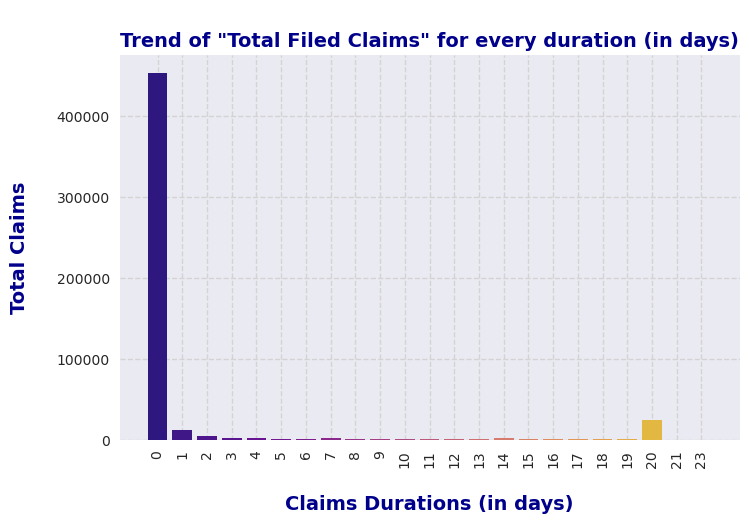

In [101]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,5))
    fig = sns.barplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Total_claims', palette='plasma')    
    
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations (in days)", fontdict= label_font_dict)
    plt.ylabel("Total Claims\n", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Total Filed Claims" for every duration (in days)', fontdict=title_font_dict)
    plt.plot();

* The above graph tells us that the most number of claims are filed for 0 days and there are very less number of claims for other durations. However, we there is a tiny spike for 20 days of duration for claims.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.498039215686274

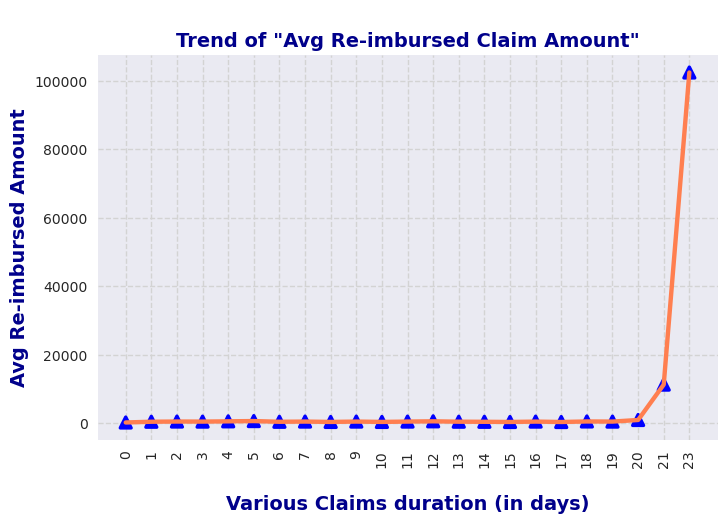

In [102]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,5))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='blue', markers="^", linestyles="")
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nVarious Claims duration (in days)", fontdict= label_font_dict)
    plt.ylabel("Avg Re-imbursed Amount", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Avg Re-imbursed Claim Amount"', fontdict=title_font_dict)
    plt.plot();

* From above graph, the Average Re-imbursed Amount is same throughout the various durations except for 21 and 23 days.

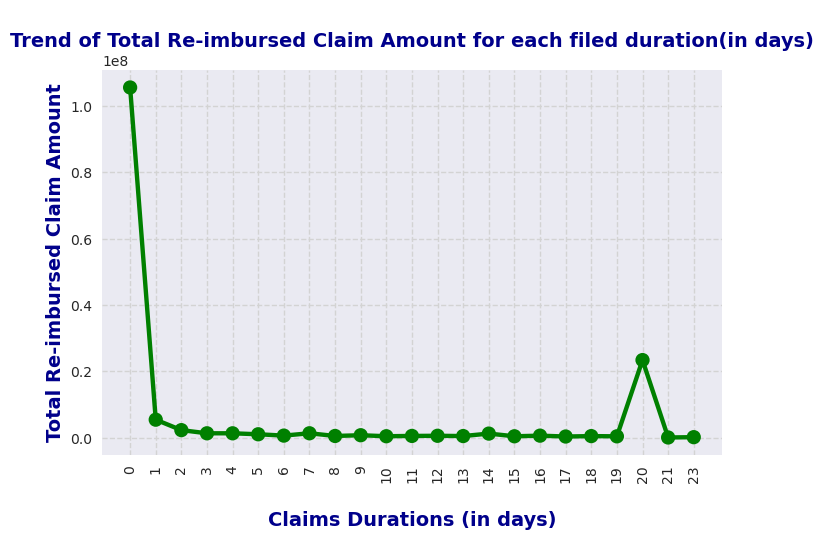

In [103]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,5))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='All_Claims_Total_Amount', color='green')
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations (in days)", fontdict= label_font_dict)
    plt.ylabel("Total Re-imbursed Claim Amount", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("\nTrend of Total Re-imbursed Claim Amount for each filed duration(in days)", fontdict=title_font_dict)
    plt.plot();


* The above graph tells us that the Total Re-imbursed Amount is the highest for 0 days claims.

* Also, for claims with durations from 2 to 19 the total re-imbursed amount is very less or similar, however, for 20 days duration we can witness a clear spike that can be a potential sign of fraudulent

### Checking the relationship between DeductibleAmtPaid and Re-imbursed Amount

In [104]:
no_of_claim_with_no_copay = train_outpatient[train_outpatient['DeductibleAmtPaid']==0].shape[0]
no_of_claim_with_no_copay

496701

In [105]:
no_of_claim_with_copay = train_outpatient[train_outpatient['DeductibleAmtPaid'] != 0].shape[0]
no_of_claim_with_copay


21036

In [106]:
re_imbursed_amt_for_no_copay = train_outpatient[train_outpatient['DeductibleAmtPaid'] == 0]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_for_no_copay


142391850

In [107]:
re_imbursed_amt_with_some_copay = train_outpatient[train_outpatient['DeductibleAmtPaid'] != 0]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_with_some_copay

5854270

In [108]:
tot_sum_of_claims_with_copay = re_imbursed_amt_with_some_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)
tot_sum_of_claims_with_copay


0.03949020723105603

In [109]:
tot_sum_of_claims_with_no_copay = re_imbursed_amt_for_no_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)
tot_sum_of_claims_with_no_copay

0.960509792768944

The findings tells us that there are 95% of total claims for which there is no co-payment.

And, for these 95% of total claims the total re-imbursed amount is 142.3 Million.


### Checking the relationship of Providers with Total number of claims filed & Re-imbursed Amount

In [110]:
#How many unique providers are there in the outpatient dataset
train_outpatient['Provider'].nunique()

5012

In [111]:
# #count of claims filed for each unique provider
provider_tot_claims_filed = pd.DataFrame(train_outpatient.groupby(['Provider'])['ClaimID'].count())
provider_tot_claims_filed

,ClaimID
Provider,
PRV51001,20
PRV51003,70
PRV51004,149
PRV51005,1165
PRV51007,69
...,...
PRV57759,28
PRV57760,22
PRV57761,82


In [112]:
#for each unique provider, calculating the total amount of money they have been reimbursed. (for all the claims they filed) 
provider_tot_reimbursed_amt = pd.DataFrame(train_outpatient.groupby(['Provider'])['InscClaimAmtReimbursed'].sum())


In [113]:
# merging provider total claims filed with provider total reimbursed amt.
prv_tot_filed_claims_and_tot_reimb_amt = pd.merge(left=provider_tot_claims_filed, right=provider_tot_reimbursed_amt, how='inner',
                                                  left_on=provider_tot_claims_filed.index, right_on=provider_tot_reimbursed_amt.index)


In [114]:
#changing the column names of prv_tot_filed_claims_and_tot_reimb_amt
prv_tot_filed_claims_and_tot_reimb_amt.columns = ['ProviderID', 'Tot_Claims_Filed', 'Tot_Re_Imbursed_Amt']

#dropping index column
prv_tot_filed_claims_and_tot_reimb_amt.reset_index(drop=True,inplace=True)

#adding percentage column
prv_tot_filed_claims_and_tot_reimb_amt['Percentage_out_of_tot_reimb_amt'] = round((prv_tot_filed_claims_and_tot_reimb_amt['Tot_Re_Imbursed_Amt'] / train_outpatient['InscClaimAmtReimbursed'].sum()) * 100, 3)


In [115]:
#for each unique provider, the maximum amount of money they have been reimbursed for any single claim they filed.

provider_max_reimbursed_amt = pd.DataFrame(train_outpatient.groupby(['Provider'])['InscClaimAmtReimbursed'].max())

provider_max_reimbursed_amt.rename(columns={"InscClaimAmtReimbursed": "Max_Re_Imbursed_Amt"}, inplace=True)


In [116]:
#merging prv_tot_filed_claims_and_tot_reimb_amt and provider_max_reimbursed_amt
prv_tot_filed_claims_tot_max_reimb_amt = pd.merge(left=prv_tot_filed_claims_and_tot_reimb_amt, 
                                                  right=provider_max_reimbursed_amt, how='inner',
                                                  left_on=prv_tot_filed_claims_and_tot_reimb_amt['ProviderID'], 
                                                  right_on=provider_max_reimbursed_amt.index)


In [117]:
prv_tot_filed_claims_tot_max_reimb_amt.drop(['key_0'], axis=1, inplace=True)

#adding the difference column (between total and max reimbursd amt)
prv_tot_filed_claims_tot_max_reimb_amt['Diff_in_Tot_and_Max'] = prv_tot_filed_claims_tot_max_reimb_amt['Tot_Re_Imbursed_Amt'] - \
prv_tot_filed_claims_tot_max_reimb_amt['Max_Re_Imbursed_Amt']

prv_tot_filed_claims_tot_max_reimb_amt.head()

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
0,PRV51001,20,7640,0.005,1500,6140
1,PRV51003,70,32670,0.022,3300,29370
2,PRV51004,149,52170,0.035,3300,48870
3,PRV51005,1165,280910,0.189,4080,276830
4,PRV51007,69,14710,0.010,3300,11410


In [118]:
#sorting prv_tot_filed_claims_tot_max_reimb_amt

prv_tot_filed_claims_tot_max_reimb_amt.sort_values(by=['Diff_in_Tot_and_Max','Max_Re_Imbursed_Amt','Percentage_out_of_tot_reimb_amt'],
                                                   axis=0, inplace=True)

In [119]:
prv_tot_filed_claims_tot_max_reimb_amt.iloc[200:220]

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
4116,PRV56539,1,900,0.001,900,0
4645,PRV57283,1,900,0.001,900,0
4387,PRV56906,1,1100,0.001,1100,0
3440,PRV55622,1,1500,0.001,1500,0
521,PRV51689,1,1700,0.001,1700,0
3430,PRV55610,1,1700,0.001,1700,0
3467,PRV55657,1,1700,0.001,1700,0
4701,PRV57357,1,1700,0.001,1700,0
4326,PRV56819,1,1900,0.001,1900,0
5010,PRV57762,1,1900,0.001,1900,0


The above table showing us the Provider Ids who only filed 1 or 2 claims and got the entire amount re-imbursed.

## Merging the Datasets

In [120]:
# Commom columns in inpatient and outpatient data

common_cols = [col for col in train_inpatient.columns if col in train_outpatient.columns]
len(common_cols)

28

In [121]:
# Merging the IP and OP dataset on the basis of common columns

train_ip_op_data = pd.merge(left=train_inpatient, right=train_outpatient, left_on=common_cols, right_on=common_cols, how="outer")
train_ip_op_data.shape

(558211, 32)

In [122]:
train_ip_op_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_Duration,Admitted_Days
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2,2.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8,8.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [123]:
train_ip_op_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BeneID                  558211 non-null  object        
 1   ClaimID                 558211 non-null  object        
 2   ClaimStartDt            558211 non-null  datetime64[ns]
 3   ClaimEndDt              558211 non-null  datetime64[ns]
 4   Provider                558211 non-null  object        
 5   InscClaimAmtReimbursed  558211 non-null  int64         
 6   AttendingPhysician      556703 non-null  object        
 7   OperatingPhysician      114447 non-null  object        
 8   OtherPhysician          199736 non-null  object        
 9   AdmissionDt             40474 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode   145899 non-null  object        
 11  DeductibleAmtPaid       558211 non-null  float64       
 12  DischargeDt             40474 

## Merging the IP_OP Dataset with BENE Data

In [124]:
# Joining the IP_OP dataset with the BENE data

train_ip_op_bene_data = pd.merge(left=train_ip_op_data, right=train_beneficiary, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_data.shape

(558211, 54)

## Merging the IP_OP_BENE Dataset with train_y provider target label data

In [125]:
# Joining the IP_OP_BENE dataset with the train_y data

train_iobt_data = pd.merge(left=train_ip_op_bene_data, right=train_y, left_on='Provider', right_on='Provider',how='inner')
train_iobt_data.shape

(558211, 55)

## Entire Dataset

In [126]:
train_iobt_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,AGE,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,2,1,1,36000,3204,60,70,0.0,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,1,2,2,2,24000,2136,450,200,0.0,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1,2,2,2,19000,1068,100,20,0.0,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,1,2,2,17000,1068,1050,540,0.0,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,2,27000,2136,450,160,0.0,1


In [127]:
train_iobt_data.shape

(558211, 55)

In [128]:
train_iobt_data['ClaimID'].nunique()

558211

In [129]:
train_iobt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode            145899 non-

## Feature Engineering

#### Adding New column: Claim_Duration

In [130]:
train_iobt_data['ClaimStartDt'] = pd.to_datetime(train_iobt_data['ClaimStartDt'], format="%Y-%m-%d")
train_iobt_data['ClaimEndDt'] = pd.to_datetime(train_iobt_data['ClaimEndDt'], format="%Y-%m-%d")

train_iobt_data['Claim_Duration'] = (train_iobt_data['ClaimEndDt'] - train_iobt_data['ClaimStartDt']).dt.days

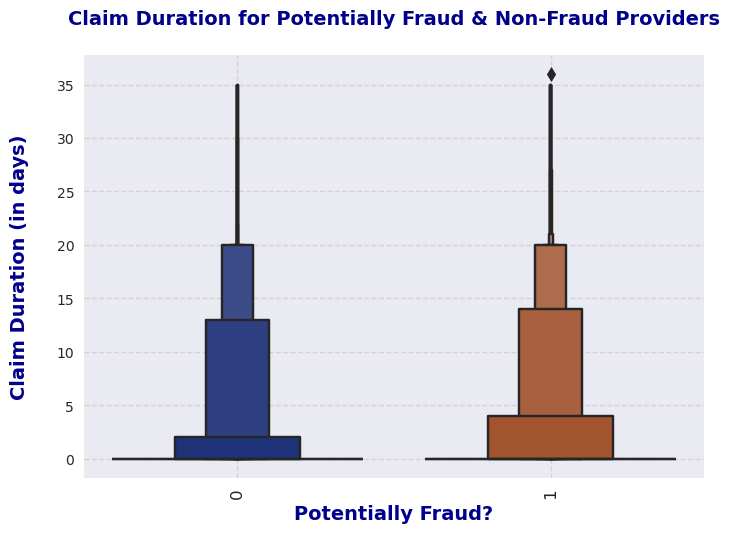

In [131]:
with plt.style.context('seaborn'):
    fig = sns.boxenplot(data=train_iobt_data, x='PotentialFraud',y='Claim_Duration', palette='dark')
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Duration (in days)\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Duration for Potentially Fraud & Non-Fraud Providers\n", fontdict=title_font_dict)
    plt.plot();

* The above plot clearly shows us that there is no difference in the distribution of Claim Duration for Potentially Fraud and Non-Fraud Providers.

#### Remove null and unwanted columns

In [132]:
columns_to_remove = ['ClmProcedureCode_6', 'ClmProcedureCode_5','ClmProcedureCode_4','ClmProcedureCode_3']
train_iobt_data = train_iobt_data.drop(columns=columns_to_remove)


#### Admitted Duration for Potentially Fraud & Non-Fraud Providers

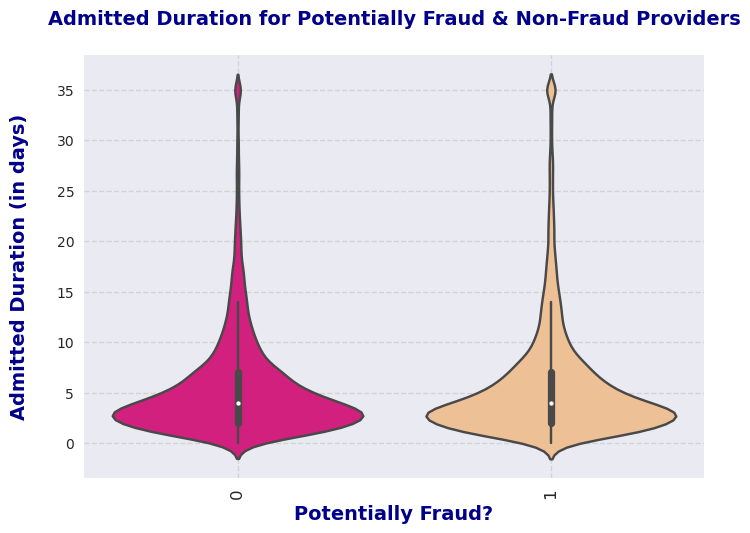

In [133]:
with plt.style.context('seaborn'):
    fig = sns.violinplot(data=train_iobt_data, x='PotentialFraud',y='Admitted_Days', palette='Accent_r')   
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Admitted Duration (in days)\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Admitted Duration for Potentially Fraud & Non-Fraud Providers\n", fontdict=title_font_dict)
    plt.plot();

* The above plot clearly shows us that there is no difference in the distribution of Admit Duration for Potentially Fraud and Non-Fraud Providers.

### Does InscClaimAmtReimbursed influences Potentially Fraud?

#### Relationship b/w InscClaimAmtReimbursed and Potentially Fraud

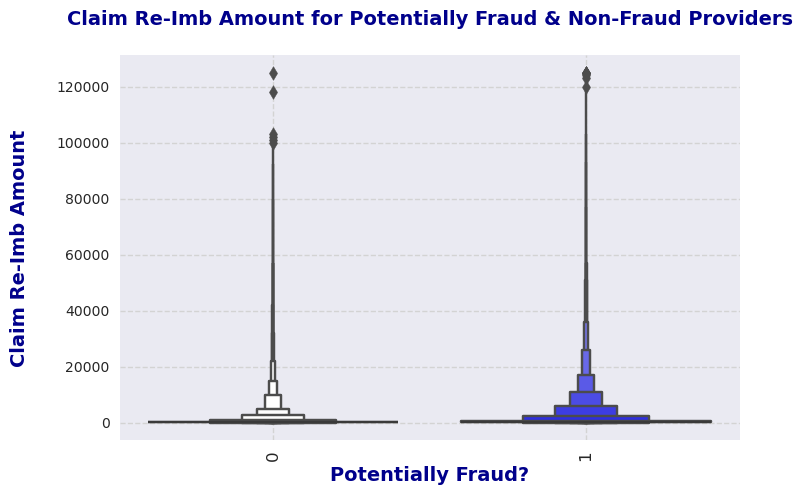

In [134]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,5))
    fig = sns.boxenplot(data=train_iobt_data, x='PotentialFraud',y='InscClaimAmtReimbursed', palette='flag')   
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Re-Imb Amount\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Re-Imb Amount for Potentially Fraud & Non-Fraud Providers\n", fontdict=title_font_dict)
    plt.plot();

*  There is no much difference in the distribution of Claim Re-Imb Amount for Potentially Fraud and Non-Fraud Providers.

### Does OPAnnualReimbursementAmt influences Potentially Fraud?

#### Relationship b/w OPAnnualReimbursementAmt and Potentially Fraud

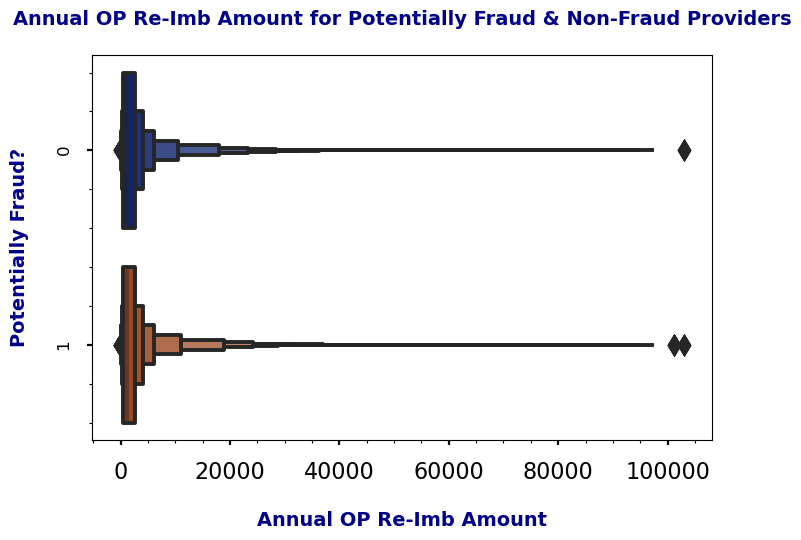

In [135]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(8,5))
    fig = sns.boxenplot(data=train_iobt_data, y='PotentialFraud', x='OPAnnualReimbursementAmt', 
                         palette='dark', orient='h')   
    # Providing the labels and title to the graph
    plt.ylabel("Potentially Fraud?\n", fontdict=label_font_dict)
    plt.yticks(rotation=90, fontsize=12)
    plt.xlabel("\nAnnual OP Re-Imb Amount", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Annual OP Re-Imb Amount for Potentially Fraud & Non-Fraud Providers\n", fontdict=title_font_dict)
    plt.plot();

* The above plot clearly shows us that there is no difference in the distribution of Annual OP Re-Imb Amount for Potentially Fraud and Non-Fraud Providers.

### Adding New Feature: Sum of Insc Claim Re-Imb Amount for a Provider

* The idea behind adding this feature is that there might be a pattern like if the sum of claim re-imb amount for a provider is very high or low then it might influence the fraud.

In [136]:
train_iobt_data['PRV_Insc_Clm_ReImb_Amt'] = train_iobt_data.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('sum')

In [137]:
train_iobt_data['PRV_Insc_Clm_ReImb_Amt'].describe()

count    5.582110e+05
mean     4.877429e+05
std      7.367223e+05
min      0.000000e+00
25%      6.369000e+04
50%      2.036000e+05
75%      5.969000e+05
max      5.996050e+06
Name: PRV_Insc_Clm_ReImb_Amt, dtype: float64

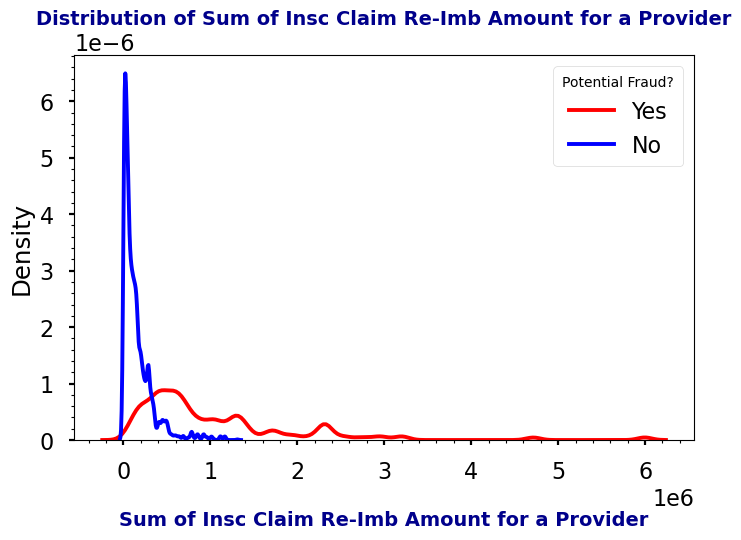

In [138]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(8,5))
    sns.kdeplot(x=train_iobt_data[train_iobt_data['PotentialFraud'] == 1]['PRV_Insc_Clm_ReImb_Amt'], color='red')
    sns.kdeplot(x=train_iobt_data[train_iobt_data['PotentialFraud'] == 0]['PRV_Insc_Clm_ReImb_Amt'], color='blue')
    # Providing the labels and title to the graph
    plt.xlabel("\nSum of Insc Claim Re-Imb Amount for a Provider", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Distribution of Sum of Insc Claim Re-Imb Amount for a Provider", fontdict=title_font_dict)
    plt.legend(labels=["Yes", "No"], title="Potential Fraud?");

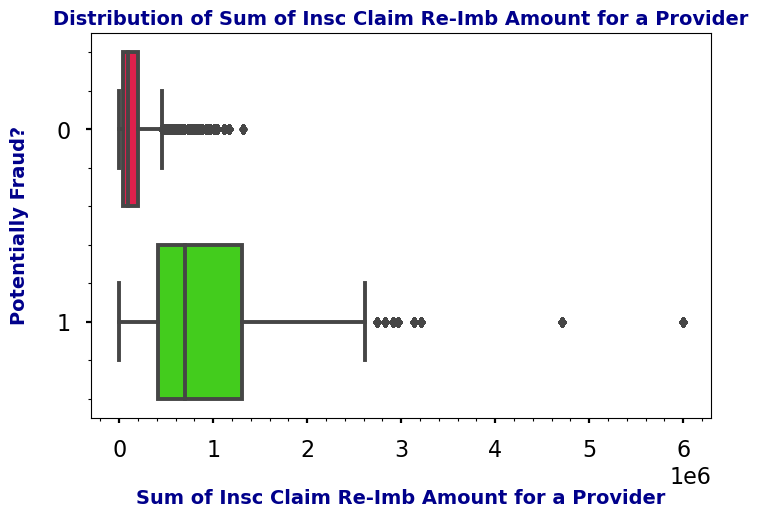

In [139]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(8,5))
    fig = sns.boxplot(data=train_iobt_data, y='PotentialFraud', x='PRV_Insc_Clm_ReImb_Amt', palette='prism_r', orient='h')   
    # Providing the labels and title to the graph
    plt.ylabel("Potentially Fraud?\n", fontdict=label_font_dict)
    plt.xlabel("\nSum of Insc Claim Re-Imb Amount for a Provider", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Distribution of Sum of Insc Claim Re-Imb Amount for a Provider", fontdict=title_font_dict)
    plt.plot();

* The above box plots suggest that if PRV_Insc_Clm_ReImb_Amt is high then it increases the chances of fraud.

In [140]:
# Joining with the PRV Tgt Labels
prv_claims_df = pd.DataFrame(train_iobt_data.groupby(['Provider'])['ClaimID'].count()).reset_index()
prv_claims_tgt_lbls_df = pd.merge(left=prv_claims_df, right=train_y, on='Provider', how='inner')
prv_claims_tgt_lbls_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,0
1,PRV51003,132,1
2,PRV51004,149,0
3,PRV51005,1165,1
4,PRV51007,72,0
...,...,...,...
5405,PRV57759,28,0
5406,PRV57760,22,0
5407,PRV57761,82,0
5408,PRV57762,1,0


In [141]:
print(pd.DataFrame(train_iobt_data['PotentialFraud'].value_counts()), "\n")

   PotentialFraud
0          345415
1          212796 



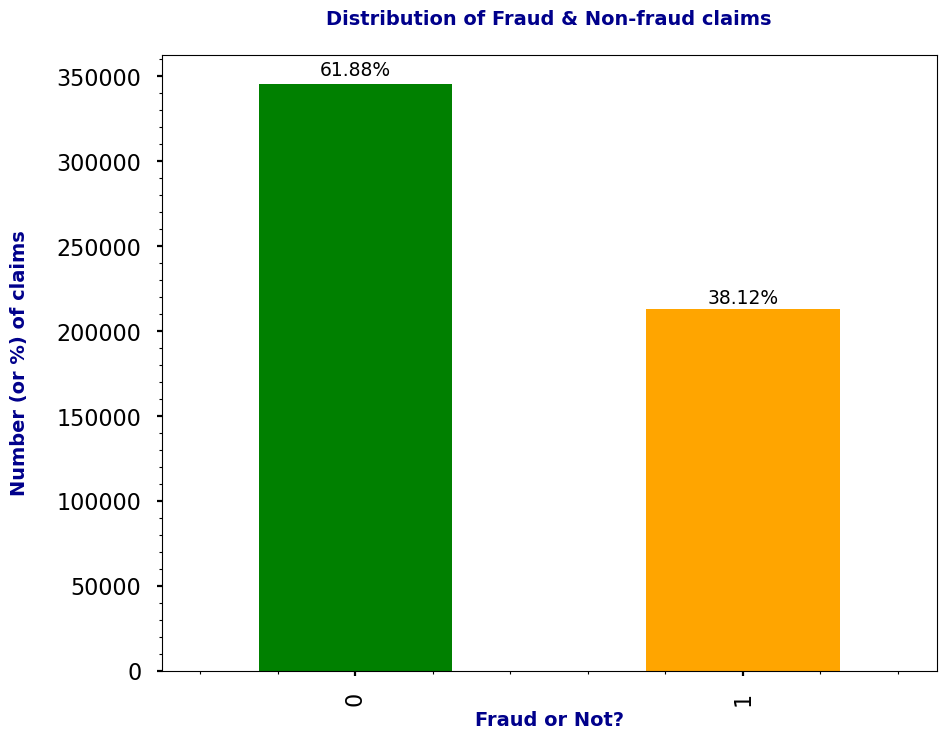

In [142]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(10,8))
    fig = train_iobt_data['PotentialFraud'].value_counts().plot(kind='bar', color=['green','orange'])
    
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_iobt_data.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)

    
    plt.xlabel("Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number (or %) of claims\n", fontdict=label_font_dict)
    #plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud claims\n", fontdict=title_font_dict)
    plt.plot();

* The above plot shows us that, 62% of claims are Non-Fraud and 32% of them are Fraudulent.

### Adding Aggregated Features: For every possible level

- Provider
- Beneficiary
- Attending Physician
- Operating Physician
- Other Physician and etc

* The idea behind adding the aggregated features at different levels is that fraud can be done by an individual or group of individuals or entities involved in the claim process.

In [143]:
# PRV Aggregate features
train_iobt_data["PRV_CoPayment"] = train_iobt_data.groupby('Provider')['DeductibleAmtPaid'].transform('sum')
train_iobt_data["PRV_IP_Annual_ReImb_Amt"] = train_iobt_data.groupby('Provider')['IPAnnualReimbursementAmt'].transform('sum')
train_iobt_data["PRV_IP_Annual_Ded_Amt"] = train_iobt_data.groupby('Provider')['IPAnnualDeductibleAmt'].transform('sum')
train_iobt_data["PRV_OP_Annual_ReImb_Amt"] = train_iobt_data.groupby('Provider')['OPAnnualReimbursementAmt'].transform('sum')
train_iobt_data["PRV_OP_Annual_Ded_Amt"] = train_iobt_data.groupby('Provider')['OPAnnualDeductibleAmt'].transform('sum')
train_iobt_data["PRV_Admit_Duration"] = train_iobt_data.groupby('Provider')['Admitted_Days'].transform('sum')
train_iobt_data["PRV_Claim_Duration"] = train_iobt_data.groupby('Provider')['Claim_Duration'].transform('sum')


In [144]:
def create_agg_feats(grp_col, feat_name, operation='sum'):
    """
    Description :: This function is created for adding the aggregated features in the dataset for every level like:
        - Beneficiary
        - Attending Physician
        - Operating Physician
        - Other Physician and etc..
        
    Input Parameters :: It accepts below inputs:
        - grp_col : `str`
            - It represents the feature or level at which you want to perform the aggregation.
        
        - feat_name : `str`
            - It represents the feature whose aggregated aspect you want to capture.
        
        - operation : `str`
            - It represents the aggregation operation you want to perform.(By default it is SUM)
    """
    feat_1 = feat_name + "_Insc_ReImb_Amt"
    train_iobt_data[feat_1] = train_iobt_data.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)

    feat_2 = feat_name + "_CoPayment"
    train_iobt_data[feat_2] = train_iobt_data.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)

    feat_3 = feat_name + "_IP_Annual_ReImb_Amt"
    train_iobt_data[feat_3] = train_iobt_data.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)

    feat_4 = feat_name + "_IP_Annual_Ded_Amt"
    train_iobt_data[feat_4] = train_iobt_data.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)

    feat_5 = feat_name + "_OP_Annual_ReImb_Amt"
    train_iobt_data[feat_5] = train_iobt_data.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)

    feat_6 = feat_name + "_OP_Annual_Ded_Amt"
    train_iobt_data[feat_6] = train_iobt_data.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)

    feat_7 = feat_name + "_Admit_Duration"
    train_iobt_data[feat_7] = train_iobt_data.groupby(grp_col)['Admitted_Days'].transform(operation)

    feat_8 = feat_name + "_Claim_Duration"
    train_iobt_data[feat_8] = train_iobt_data.groupby(grp_col)['Claim_Duration'].transform(operation)
# BENE, PHYs, Diagnosis Admit and Group Codes columns
create_agg_feats(grp_col='BeneID', feat_name="BENE")
create_agg_feats(grp_col='AttendingPhysician', feat_name="ATT_PHY")
create_agg_feats(grp_col='OperatingPhysician', feat_name="OPT_PHY")
create_agg_feats(grp_col='OtherPhysician', feat_name="OTH_PHY")
create_agg_feats(grp_col='ClmAdmitDiagnosisCode', feat_name="Claim_Admit_Diag_Code")
create_agg_feats(grp_col='DiagnosisGroupCode', feat_name="Diag_GCode")

In [145]:
# Diagnosis Codes columns
create_agg_feats(grp_col='ClmDiagnosisCode_1', feat_name="Claim_DiagCode1")
create_agg_feats(grp_col='ClmDiagnosisCode_2', feat_name="Claim_DiagCode2")
create_agg_feats(grp_col='ClmDiagnosisCode_3', feat_name="Claim_DiagCode3")
create_agg_feats(grp_col='ClmDiagnosisCode_4', feat_name="Claim_DiagCode4")
create_agg_feats(grp_col='ClmDiagnosisCode_5', feat_name="Claim_DiagCode5")
create_agg_feats(grp_col='ClmDiagnosisCode_6', feat_name="Claim_DiagCode6")
create_agg_feats(grp_col='ClmDiagnosisCode_7', feat_name="Claim_DiagCode7")
create_agg_feats(grp_col='ClmDiagnosisCode_8', feat_name="Claim_DiagCode8")
create_agg_feats(grp_col='ClmDiagnosisCode_9', feat_name="Claim_DiagCode9")
create_agg_feats(grp_col='ClmDiagnosisCode_10', feat_name="Claim_DiagCode10")

# Medical Procedure Codes columns
create_agg_feats(grp_col='ClmProcedureCode_1', feat_name="Claim_ProcCode1")
create_agg_feats(grp_col='ClmProcedureCode_2', feat_name="Claim_ProcCode2")


/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/4191920879.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data[feat_2] = train_iobt_data.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/4191920879.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data[feat_3] = train_iobt_data.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/41

/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/4191920879.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data[feat_1] = train_iobt_data.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/4191920879.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data[feat_2] = train_iobt_data.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/4191

In [146]:
train_iobt_data.shape

(558211, 203)

Adding Aggregated Features: Based on various combinations of different levels in order to introduce their interactions in the dataset.

- PROVIDER <--> BENE <--> PHYSICIANS
- PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> PROCEDURE CODES
- PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> PROCEDURE CODES
- PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> PROCEDURE CODES
- PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> DIAGNOSIS CODES
- PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> DIAGNOSIS CODES
- PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> DIAGNOSIS CODES
- PROVIDER <--> BENE <--> DIAGNOSIS CODES <--> PROCEDURE CODES and etc..

The idea behind adding the aggregated features based on the combinations of various features is that many parties or entities might work together to make a medicare fraud. Thus, we need to capture interactions among them to better classify the fraudsters.

In [147]:
# PROVIDER <--> other features : To get claim counts
train_iobt_data["ClmCount_Provider"]=train_iobt_data.groupby(['Provider'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID"]=train_iobt_data.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_AttendingPhysician"]=train_iobt_data.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_OtherPhysician"]=train_iobt_data.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_OperatingPhysician"]=train_iobt_data.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmAdmitDiagnosisCode"]=train_iobt_data.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmDiagnosisCode_1"]=train_iobt_data.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmDiagnosisCode_2"]=train_iobt_data.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmDiagnosisCode_3"]=train_iobt_data.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmDiagnosisCode_4"]=train_iobt_data.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmDiagnosisCode_6"]=train_iobt_data.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmDiagnosisCode_7"]=train_iobt_data.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmDiagnosisCode_8"]=train_iobt_data.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmDiagnosisCode_9"]=train_iobt_data.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_ClmDiagnosisCode_10"]=train_iobt_data.groupby(['Provider','ClmDiagnosisCode_10'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_DiagnosisGroupCode"]=train_iobt_data.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PHYSICIANS : To get claim counts
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')


/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/904089582.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider"]=train_iobt_data.groupby(['Provider'])['ClaimID'].transform('count')
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/904089582.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID"]=train_iobt_data.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipyke

/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/904089582.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_DiagnosisGroupCode"]=train_iobt_data.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/904089582.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician'])['C

In [148]:
# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> PROCEDURE CODES : To get claim counts
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> PROCEDURE CODES : To get claim counts
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> DIAGNOSIS CODES : To get claim counts
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_2"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_3"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_4"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_5"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_6"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_7"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_8"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_9"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_10"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> DIAGNOSIS CODES : To get claim counts
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_1"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_2"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_3"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_4"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_5"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_6"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_7"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_8"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_9"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_10"]=train_iobt_data.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> DIAGNOSIS CODES : To get claim counts
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_1"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_2"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_3"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_4"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_5"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_6"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_7"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_8"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_9"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_10"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PROCEDURE CODES : To get claim counts
train_iobt_data["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmProcedureCode_2'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> DIAGNOSIS CODES : To get claim counts
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_3"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_4"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_5"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_6"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_7"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_8"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_9"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_10"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_10'])['ClaimID'].transform('count')



/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/818373930.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/818373930.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_2

/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/818373930.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_10"]=train_iobt_data.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/818373930.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCo

/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/818373930.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_5"]=train_iobt_data.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/818373930.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_6"]=train_i

/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/818373930.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_9"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/818373930.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_10"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiag

In [149]:
# PROVIDER <--> BENE <--> DIAGNOSIS CODES <--> PROCEDURE CODES : To get claim counts
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_2'])['ClaimID'].transform('count')


/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/4287057582.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/4287057582.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode

/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/4287057582.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2"]=train_iobt_data.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_2'])['ClaimID'].transform('count')
/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/4287057582.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_iobt_data["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCo

In [150]:
train_iobt_data.shape

(558211, 292)

In [151]:
# Removing unwanted columns
remove_unwanted_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                      'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt', 'DiagnosisGroupCode',
                      'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
                      'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                      'ClmProcedureCode_1', 'ClmProcedureCode_2', 'DOB','State', 'County' ]

train_iobt_data.drop(columns=remove_unwanted_columns, axis=1, inplace=True)

In [152]:
train_iobt_data.shape

(558211, 266)

In [153]:
# Filling Nulls in Deductible Amt Paid by Patient
train_iobt_data['DeductibleAmtPaid'].fillna(value=0, inplace=True)

In [154]:
train_iobt_data.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'Claim_Duration', 'Admitted_Days', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure',
       ...
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_2',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2'],
      dtype='object', length=266)

## Preprocessing

In [155]:
# Encoding the Categorical features
#train_iobt_data = pd.get_dummies(train_iobt_data,columns=['Gender', 'Race', ], drop_first=True)

In [156]:
pd.set_option('display.max_rows',310)

In [157]:
# Checking Nulls in the features
pd.DataFrame(train_iobt_data.isna().sum())

,0
Provider,0
InscClaimAmtReimbursed,0
DeductibleAmtPaid,0
Claim_Duration,0
Admitted_Days,517737
Gender,0
Race,0
RenalDiseaseIndicator,0
ChronicCond_Alzheimer,0
ChronicCond_Heartfailure,0


In [158]:
# Filling Nulls in the aggregated features
train_iobt_data.fillna(value=0, inplace=True)

In [159]:
# Checking Nulls in the features
pd.DataFrame(train_iobt_data.isna().sum())

,0
Provider,0
InscClaimAmtReimbursed,0
DeductibleAmtPaid,0
Claim_Duration,0
Admitted_Days,0
Gender,0
Race,0
RenalDiseaseIndicator,0
ChronicCond_Alzheimer,0
ChronicCond_Heartfailure,0


In [160]:
train_iobt_data.dtypes

Provider                                                            object
InscClaimAmtReimbursed                                               int64
DeductibleAmtPaid                                                  float64
Claim_Duration                                                       int64
Admitted_Days                                                      float64
Gender                                                               int64
Race                                                                 int64
RenalDiseaseIndicator                                               object
ChronicCond_Alzheimer                                                int64
ChronicCond_Heartfailure                                             int64
ChronicCond_KidneyDisease                                            int64
ChronicCond_Cancer                                                   int64
ChronicCond_ObstrPulmonary                                           int64
ChronicCond_Depression   

### Entire Data Aggregation : At provider level

The main objective is to predict the Medicare Provider Fraud. Thus, here we are grouping the entire dataset at the level of PROVIDER and taking SUM of all the columns to create n-dimensional representation of each provider.

In [161]:
train_iobt_data = train_iobt_data.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')

/var/folders/dr/bq_yqfv17s7ds_x4dngdrn4r0000gn/T/ipykernel_49345/3181301619.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_iobt_data = train_iobt_data.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')


In [162]:
train_iobt_data.shape

(5410, 265)